In [1]:
# Import all necessary libraries.
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import expit
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron
from matplotlib.colors import ListedColormap
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# Define the number of examples.
N = 1000
# Create the dataset.
centers = [[-0.5, 0], [0, 1.5]]
X, y = make_blobs(n_samples=N, centers=centers, random_state=42)

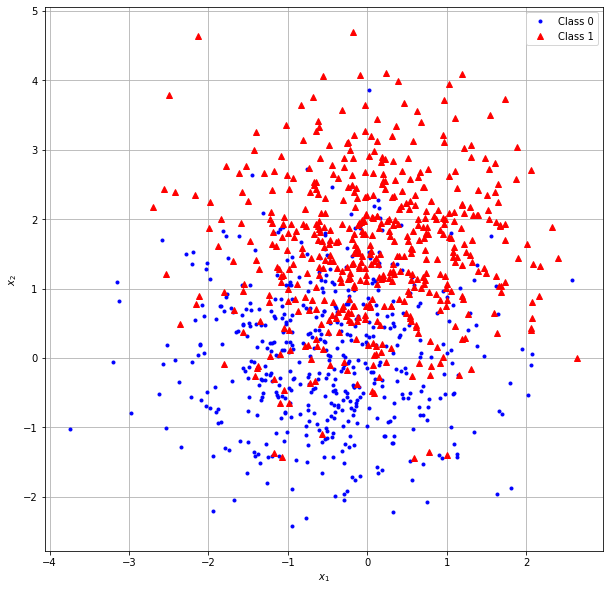

In [3]:
# Plot training data set.
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

fig = plt.figure(figsize=(10,10))
plt.plot(X[idx0,0], X[idx0,1], 'b.', label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'r^', label='Class 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid()
plt.show()

## Decision Tree and Accuracy of Test Set

In [4]:
# Create classifier.
per = Perceptron(random_state=42)

# Fit the classifier on the training features and labels.
per.fit(X, y)

# Use the trained classifier to predict labels for the test features.
y_pred = per.predict(X)

# Calculate and return the accuracy on the test data
accuracy = accuracy_score(y, y_pred)
print('Accuracy: ',accuracy*100,'%')        

Accuracy:  76.2 %


## DecisionTree Classifier - Confusion Matrix

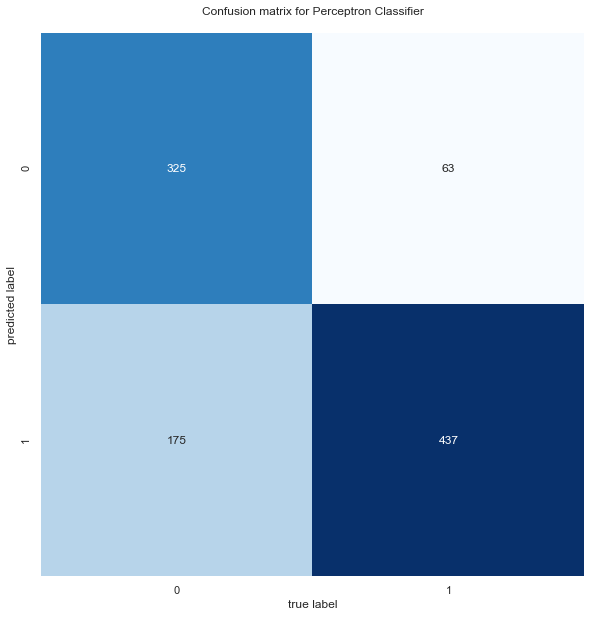

In [5]:
# Plot the confusion matrix
fig = plt.figure(figsize=(10,10))
mat = confusion_matrix(y, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title("Confusion matrix for Perceptron Classifier\n")
plt.show()

## Plot of Decision boundary - DecisionTree Classifer

(4718, 4718)


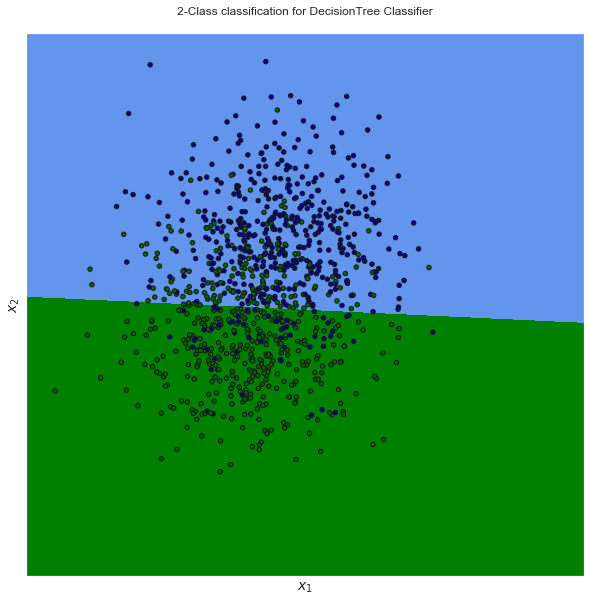

In [6]:
# step size in the mesh
h = .002  

# Create color maps
cmap_light = ListedColormap(['green', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkgreen', 'c', 'darkblue'])

# Plot the decision boundary. 
plt.figure(1, figsize=(10, 10))

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X.min() - .5, X.max() + .5
y_min, y_max = X.min() - .5, X.max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = per.predict(np.c_[xx.ravel(), yy.ravel()])

print(xx.shape)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolors='k',s=20)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('2-Class classification for DecisionTree Classifier\n')
plt.show()

## Decision Tree and Accuracy of Test Set

In [7]:
# Create classifier.
per = LogisticRegression(solver='lbfgs', random_state=42)

# Fit the classifier on the training features and labels.
per.fit(X, y)

# Use the trained classifier to predict labels for the test features.
y_pred = per.predict(X)

# Calculate and return the accuracy on the test data
accuracy = accuracy_score(y, y_pred)
print('accuracy: ',accuracy*100,'%')

accuracy:  79.7 %


## DecisionTree Classifier - Confusion Matrix

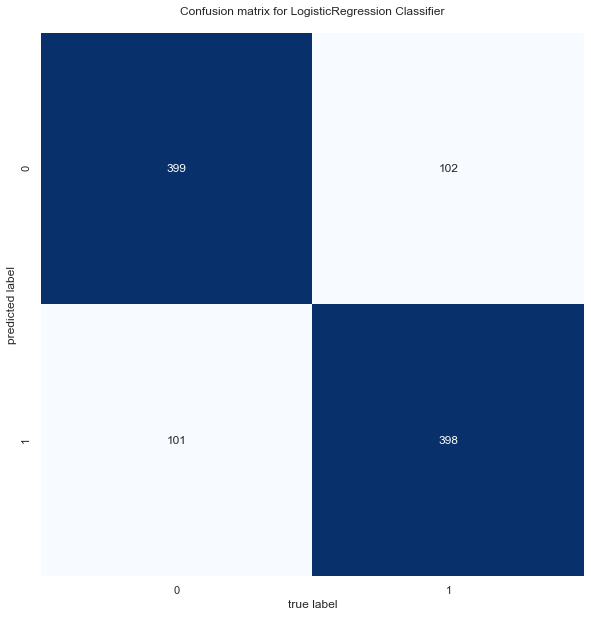

In [8]:
# Plot the confusion matrix
fig = plt.figure(figsize=(10,10))
mat = confusion_matrix(y, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title("Confusion matrix for LogisticRegression Classifier\n")
plt.show()

## Plot of Decision boundary - DecisionTree Classifer

(4718, 4718)


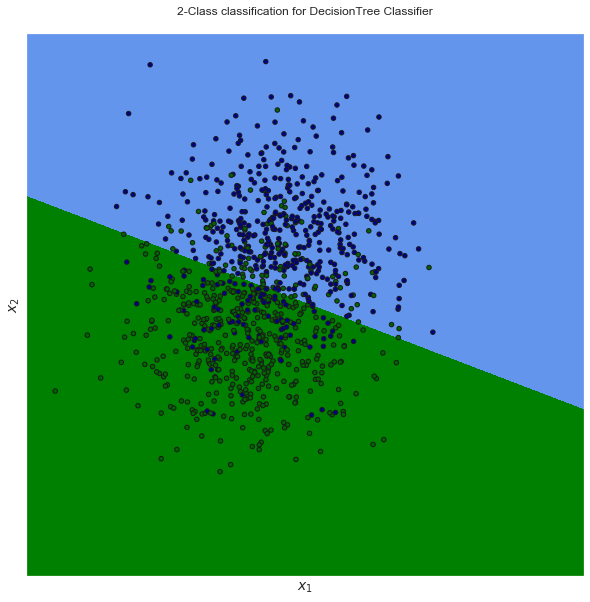

In [9]:
# step size in the mesh
h = .002  

# Create color maps
cmap_light = ListedColormap(['green', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkgreen', 'c', 'darkblue'])

# Plot the decision boundary. 
plt.figure(1, figsize=(10, 10))

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X.min() - .5, X.max() + .5
y_min, y_max = X.min() - .5, X.max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = per.predict(np.c_[xx.ravel(), yy.ravel()])

print(xx.shape)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolors='k',s=20)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('2-Class classification for DecisionTree Classifier\n')
plt.show()

## Resposta:
Analisando os resultados, pode-se dizer que o classificador que utiliza Regressão Logística apresenta uma melhor performance. Isto acontece porque o classificação com Perceptron irá convergir apenas quando o conjunto de dados for separável de forma linear conforme o exemplo acima.

O classificador Perceptron não produz como saída uma probabilidade de classe, este apenas faz a previsão com base em um limiar rígido 0 ou 1.
   